## Linear Regression - Part2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn import datasets

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, scorer

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import PolynomialFeatures


### Multiple Linear Regression

#### Training Data
<img src="http://people.bu.edu/kalathur/figs/lr4.jpg" width="500"/>

In [3]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [7, 9, 13, 17.5, 18]

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
model.coef_

array([1.0104, 0.3958])

In [5]:
model.intercept_

1.1875

#### Test Data
<img src="http://people.bu.edu/kalathur/figs/lr4.jpg" width="500"/>

In [6]:
X_test = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y_test = [7, 9, 13, 17.5, 18]

predictions = model.predict(X_test)

for i, prediction in enumerate(predictions):
    print('Predicted: ${0:.2f}, With Equation: ${1:.2f}, Target: ${2:.2f}'.format(
        prediction, 
        np.dot(model.coef_, X_test[i]) + model.intercept_,
        y_test[i]))

Predicted: $8.04, With Equation: $8.04, Target: $7.00
Predicted: $9.67, With Equation: $9.67, Target: $9.00
Predicted: $11.29, With Equation: $11.29, Target: $13.00
Predicted: $16.12, With Equation: $16.12, Target: $17.50
Predicted: $19.38, With Equation: $19.38, Target: $18.00


In [7]:
print("R-squared score: {:.4f}".format(
    model.score(X_test, y_test)))

R-squared score: 0.9153


### Polynomial Fit

 - Quadratic: $y = \alpha + \beta_1x + \beta_2x^2$

#### Training Data
<img src="http://people.bu.edu/kalathur/figs/lr_2.jpg" width="500"/>

In [8]:
X_train = [[6], [8], [10], [14], [18]]
y_train = [7, 9, 13, 17.5, 18]

In [9]:
X_test = [[6], [8], [11], [16]]
y_test = [8, 12, 15, 18]

In [10]:
lr = LinearRegression()

In [11]:
# For plotting

X_fit = np.linspace(0, 26, 100)[:, np.newaxis]
X_fit[:5]

array([[0.    ],
       [0.2626],
       [0.5253],
       [0.7879],
       [1.0505]])

In [12]:
lr.fit(X_train, y_train)

# For plotting
y_lin_fit = lr.predict(X_fit)

In [13]:
linear_r2 = lr.score(X_test, y_test)
print("Linear Fit R-squared score: {:.4f}".format(
    linear_r2))

Linear Fit R-squared score: 0.8097


In [14]:
quadratic = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic.fit_transform(X_train)
X_train_quadratic

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  14., 196.],
       [  1.,  18., 324.]])

In [15]:
X_test_quadratic = quadratic.transform(X_test)
X_test_quadratic

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  11., 121.],
       [  1.,  16., 256.]])

In [16]:
lr.fit(X_train_quadratic, y_train)

# For plotting
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))

In [17]:
lr.predict(X_test_quadratic)

array([ 6.3865, 10.0021, 14.1953, 17.903 ])

In [18]:
y_test

[8, 12, 15, 18]

In [19]:
quadratic_r2 = lr.score(X_test_quadratic, y_test)
print("Quadratic R-squared score: {:.4f}".format(
    quadratic_r2))

Quadratic R-squared score: 0.8675


In [20]:
cubic = PolynomialFeatures(degree=3)
X_train_cubic = cubic.fit_transform(X_train)
X_train_cubic

array([[   1.,    6.,   36.,  216.],
       [   1.,    8.,   64.,  512.],
       [   1.,   10.,  100., 1000.],
       [   1.,   14.,  196., 2744.],
       [   1.,   18.,  324., 5832.]])

In [21]:
X_test_cubic = cubic.transform(X_test)
X_test_cubic

array([[   1.,    6.,   36.,  216.],
       [   1.,    8.,   64.,  512.],
       [   1.,   11.,  121., 1331.],
       [   1.,   16.,  256., 4096.]])

In [22]:
lr.fit(X_train_cubic, y_train)

# For plotting
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))

In [23]:
lr.predict(X_test_cubic)

array([ 6.8449,  9.4962, 14.0337, 18.6776])

In [24]:
y_test

[8, 12, 15, 18]

In [25]:
cubic_r2 = lr.score(X_test_cubic, y_test)
print("Cubic R-squared score: {:.4f}".format(
    cubic_r2))

Cubic R-squared score: 0.8357


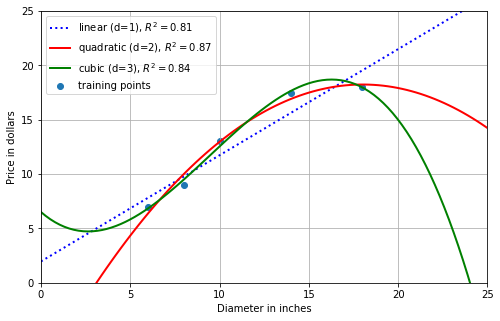

In [26]:
plt.figure(figsize=(8, 5))

plt.scatter(X_train, y_train, label='training points')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2,
         linestyle='-')


plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.legend(loc='upper left');

In [27]:
# Degree 9 polynomial

In [28]:
nonic = PolynomialFeatures(degree=9)
X_train_nonic = nonic.fit_transform(X_train)
X_test_nonic  = nonic.transform(X_test)

In [29]:
lr.fit(X_train_nonic, y_train)

# For plotting
y_nonic_fit = lr.predict(nonic.fit_transform(X_fit))

In [30]:
nonic_r2 = lr.score(X_test_nonic, y_test)
print("Nonic R-squared score: {:.4f}".format(
    nonic_r2))

Nonic R-squared score: -0.0944


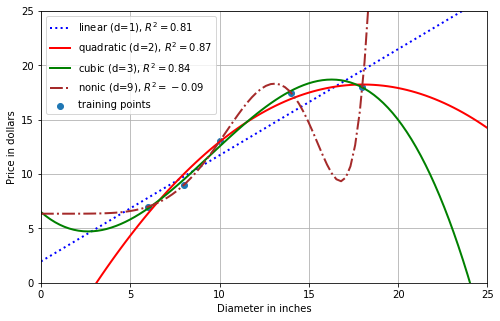

In [31]:
plt.figure(figsize=(8, 5))

plt.scatter(X_train, y_train, label='training points')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_nonic_fit, 
         label='nonic (d=9), $R^2={:.2f}$'.format(nonic_r2),
         color='brown', 
         lw=2,
         linestyle='-.')


plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.legend(loc='upper left');

- The ninth-degree polynomial regression model fits the training data almost exactly! 
- The model's r-squared score, however, is -0.09. 
- An extremely complex model that fits the training data exactly, but fails to approximate the real relationship. 
- This problem is called over-fitting.

In [32]:
X_pred = [[16], [20]]
X_pred_nonic = nonic.transform(X_pred)
lr.predict(X_pred_nonic)

array([ 10.9449, 131.7757])

- Over-fitted model predicts that the 16 inch pizza should be prized \\$11 and a 20 inch pizza should be prized at \\$132